# Test de Pyaudio
---
Método de instalación
::No disponible en Anaconda cloud ***

## Windows:
python -m pip install pyaudio

## Mac:

brew install portaudio 
pip install pyaudio

Requiere instalar Homebrew como prerequisito, y usa ruby*
/usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"

## Linux:

sudo apt-get install python-pyaudio python3-pyaudio

o

pip install pyaudio

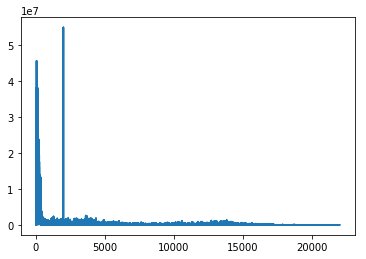

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pyaudio  
import wave  

#########################
#Modificación del archivo, agregado del ruido

fs, data = wavfile.read('Another.wav')
L = len(data)

Noise=np.int16(500*(np.sin(2*np.pi*20000*np.linspace(0,1,L))))
Noise=(data+Noise)/2
#wavfile.write('another3.wav',fs,Noise)

#######################
#Reproducir audio de entrada
chunk = 1024  
p = pyaudio.PyAudio()  
#Abrir Stream
#f = wave.open("Another.wav","rb")  
f = wave.open("another3.wav","rb")  
stream = p.open(format = p.get_format_from_width(f.getsampwidth()),  
                channels = f.getnchannels(),  
                rate = f.getframerate(),  
                output = True)  
#Leer información
data = f.readframes(chunk)
  
#Reproducir Audio
while data:  
   stream.write(data)  
   data = f.readframes(chunk)  
#Cerrar Stream 
stream.stop_stream()  
stream.close()    
p.terminate() 

L = len(Noise)
c = np.fft.fft(Noise) # create a list of complex number
freq = np.fft.fftfreq(L)
freq_en_hertz = abs(freq * fs)
plt.plot(freq_en_hertz, abs(c))
plt.show()